In [2]:
pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 11.0 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from PIL import Image as im

from matplotlib import pyplot as plt

import rasterio

In [4]:
mask_pat = "mascara320.tif"

In [5]:
# Open the image
with rasterio.open(mask_pat) as src:
    # Read the image bands into a NumPy array
    mask_array = src.read()

print(mask_array.shape)
mascara = np.squeeze(mask_array)
mascara.shape

(1, 2144, 2939)


(2144, 2939)

In [6]:
data_path = "data320.tif"
with rasterio.open(data_path) as src:
    # Read the image bands into a NumPy array
    image_array = src.read()

print(image_array.shape)

(11, 2144, 2939)


In [7]:
def get_values(x,y,px,py):
    rows = x//px
    cols = y//py

    diffx = x-(px*rows)
    diffy = y-(py*cols)

    return diffx/2,diffy/2, rows,cols

In [8]:
get_values(2144,2939,544,480)

(256.0, 29.5, 3, 6)

In [9]:
def divide_image_np(image, rows, cols):
    """
    Divides an image into a specified number of rows and columns.

    Args:
    - image: A NumPy array representing the image.
    - rows: The number of rows to divide the image into.
    - cols: The number of columns to divide the image into.

    Returns:
    - A list of NumPy arrays, each representing a sub-image.
    """
    h, w = image[0].shape
    #print(h//rows*row,h//rows*(row+1), w//cols*col,w//cols*(col+1))
    return np.array([image[:,h//rows*row:h//rows*(row+1), w//cols*col:w//cols*(col+1)] for row in range(rows) for col in range(cols)])


def divide_image_masks(image, rows, cols):
    h, w = image.shape
    #print(h//rows*row,h//rows*(row+1), w//cols*col,w//cols*(col+1))
    return np.array([image[h//rows*row:h//rows*(row+1), w//cols*col:w//cols*(col+1)] for row in range(rows) for col in range(cols)])

In [10]:
image_array = np.nan_to_num(image_array)

In [11]:
image_array.shape


(11, 2144, 2939)

In [12]:
mean = np.mean(image_array, axis=(1, 2))  # Averaging over the spatial dimensions
std = np.std(image_array, axis=(1, 2))

In [14]:

print(mask_array.shape)
mascara = np.squeeze(mask_array)
mascara.shape

(1, 2144, 2939)


(2144, 2939)

In [15]:
mascara[mascara == -5] = 0

mascara[mascara == 2] = 1
mascara[mascara == 3] = 1
mascara[mascara == 6] = 1
mascara[mascara == 12] = 1



mascara[mascara == 12] = 1
mascara[mascara == 28] = 3

mascara[mascara == 29] = 2
mascara[mascara == 30] = 5
mascara[mascara == 31] = 6
mascara[mascara == 32] = 4
mascara[mascara == 280] = 3

mascara[mascara == 14] = 1
mascara[mascara == 21] = 3
mascara[mascara == 23] = 3
mascara[mascara == 25] = 3
mascara[mascara == 26] = 3
mascara[mascara == 27] = 3

mascara[mascara == 290] = 2

In [16]:
cutted_mask = mascara[256:-256,29:-30]
cutted_mask.shape

(1632, 2880)

In [17]:
cutted_matriz = image_array[:,256:-256,29:-30]
cutted_matriz.shape

(11, 1632, 2880)

In [21]:
images = divide_image_np(cutted_matriz,3,6)
images.shape

(18, 11, 544, 480)

In [22]:
mascara_img =  divide_image_masks(cutted_mask,3,6)
mascara_img.shape

(18, 544, 480)

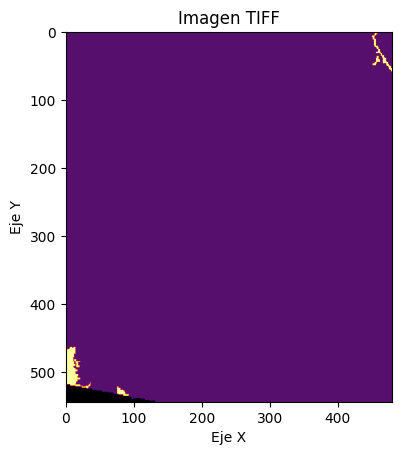

In [26]:
fig, ax = plt.subplots()

# Plottear la imagen
ax.imshow(mascara_img[15], cmap='inferno')  # Puedes cambiar el mapa de colores según tu necesidad

# Configurar etiquetas y título (opcional)
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Imagen TIFF')


# Mostrar la imagen
plt.show()

In [30]:
for i,j in enumerate(mascara_img):
  if not np.all(j == 0):
    array = j.astype(np.float32)
    np.save(f'masks/{i}.npy', array)
    #np.save(f'/home/gomosak/conafor/npy_mask_500/{i+longitud}.npy', array)
      
      
    img = images[i]
    img = img.astype(np.float32)
    np.save(f'data/{i}.npy', img)